# Computational Methods - Homework 9
## Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808 

### Solve the same equations using scipy.integrate.odeint and scipy.integrate.solve_ivp:

$$
\begin{align*} 
\frac{dx}{dt}&=\sigma (y-x) \\
\frac{dy}{dt}&=x(\rho-z) -y \\
\frac{dz}{dt}&=xy-\beta z 
\end{align*} 
$$

for the parameters:

* $\sigma =10$
* $\rho=28$
* $\beta=8/3$

lets set intial conditions:

* x(0)=1.0
* y(0)=1.0
* z(0)=1.0

Compare the results. Seeing anything strange?

### Solution using my own routine:

$$\gamma(t) = \left( x(t), y(t), z(t) \right)$$

$$f \left( t, \gamma \right) = \frac{d \gamma}{dt} = \left( \frac{dx}{dt}, \frac{dy}{dt}, \frac{dz}{dt} \right)=\left( \sigma(y-x), x(\rho-z)-y, xy-\beta z  \right)$$

In [1]:
import numpy as np

In [2]:
def f(ti, γi):  #dγ/dt.
    
    σ = 10.; ρ = 28.; β = 8/3
    f = np.zeros(3)
    f[0] = σ * (γi[1] - γi[0])
    f[1] = γi[0] * (ρ - γi[2]) - γi[1]
    f[2] = γi[0] * γi[1] - β * γi[2]
    
    return f
    
def RK4(tif, γ0, f, h):
    
    '''
    This function calculates the solution of a set of differential equations using the Runge-Kutta 4 method.
    
    Parameters:
    ----------
    tif: list or numpy array with two numbers. 
    tif[0]: initial t.
    tif[1]: final t.
    γ0: numpy array. Initial condition of a vector function γ(t).
    f: python function. dγ/dt.
    h: spacing of t.
    
    Returns:
    ----------
    t: numpy array with values of t.
    γ: numpy array with values of γ. 
    '''
    
    t = np.arange(tif[0], tif[1] + h, h)
    γ = np.zeros((len(t), len(γ0)))
    γ[0] = γ0
    
    for i in range(0, len(t) - 1):
        
        k1 = f(t[i], γ[i])
        k2 = f(t[i] + h * 0.5, γ[i] + k1 * h * 0.5)
        k3 = f(t[i] + h * 0.5, γ[i] + k2 * h * 0.5)
        k4 = f(t[i] + h, γ[i] + k3 * h)
        
        γ[i + 1] = γ[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
    return t, γ

In [3]:
import matplotlib.pyplot as plt

#Initial conditions:
tif = [0., 35.] 
γ0 = np.array([1.0, 1.0, 1.0])
h = 0.01  #Spacing.

t, γ = RK4(tif, γ0, f, h)

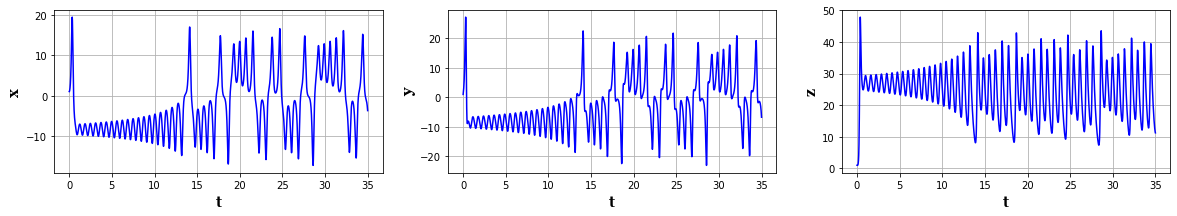

In [4]:
fig, axis = plt.subplots(ncols = 3, sharex = False, sharey = False, figsize = (20,3))

font = {'family':'Georgia','weight':'bold','size':15}

axis[0].plot(t, γ[:, 0], '-b')
axis[0].set_xlabel('t', **font)
axis[0].set_ylabel('x', **font)
axis[0].grid()

axis[1].plot(t, γ[:, 1], '-b')
axis[1].set_xlabel('t', **font)
axis[1].set_ylabel('y', **font)
axis[1].grid()

axis[2].plot(t, γ[:, 2], '-b')
axis[2].set_xlabel('t', **font)
axis[2].set_ylabel('z', **font)
axis[2].grid()

Text(0.5, 0.92, 'Lorenz 3D Plot')

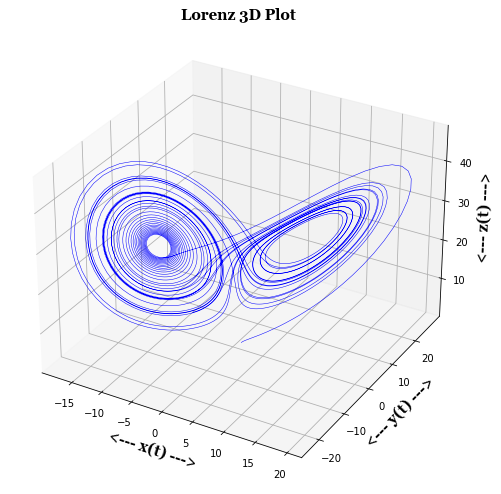

In [5]:
fig = plt.figure (figsize = (8.5,8.5))
axis = fig.gca (projection = '3d')
axis.plot (γ[:, 0], γ[:, 1], γ[:, 2], linewidth = 0.5, color = 'blue')
axis.set_xlabel('<--- x(t) --->', **font)
axis.set_ylabel('<--- y(t) --->', **font)
axis.set_zlabel('<--- z(t) --->', **font)
axis.set_title('Lorenz 3D Plot', **font)

### Solution using scipy.integrate.odeint:

In [6]:
from scipy import integrate

def Dtγ(γi, ti):  #It is the same function f, but this one has the order of the arguments reversed.
    
    σ = 10.; ρ = 28.; β = 8/3
    f = np.zeros(3)
    f[0] = σ * (γi[1] - γi[0])
    f[1] = γi[0] * (ρ - γi[2]) - γi[1]
    f[2] = γi[0] * γi[1] - β * γi[2]
    
    return f

todeint = np.linspace(tif[0], tif[1], 3501)
γodeint = integrate.odeint(Dtγ, γ0, t)

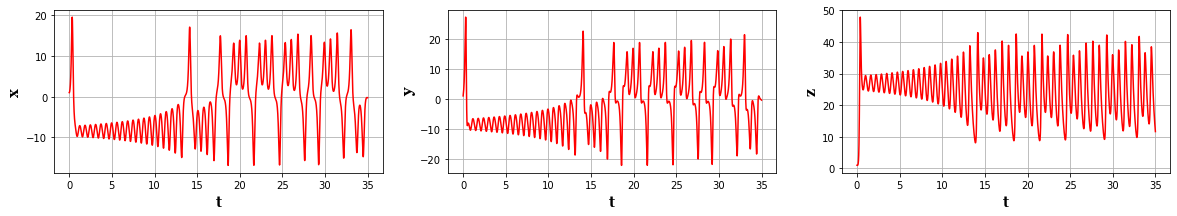

In [7]:
fig, axis = plt.subplots(ncols = 3, sharex = False, sharey = False, figsize = (20,3))

axis[0].plot(todeint, γodeint[:, 0], '-r')
axis[0].set_xlabel('t', **font)
axis[0].set_ylabel('x', **font)
axis[0].grid()

axis[1].plot(todeint, γodeint[:, 1], '-r')
axis[1].set_xlabel('t', **font)
axis[1].set_ylabel('y', **font)
axis[1].grid()

axis[2].plot(todeint, γodeint[:, 2], '-r')
axis[2].set_xlabel('t', **font)
axis[2].set_ylabel('z', **font)
axis[2].grid()

Text(0.5, 0.92, 'Lorenz 3D Plot')

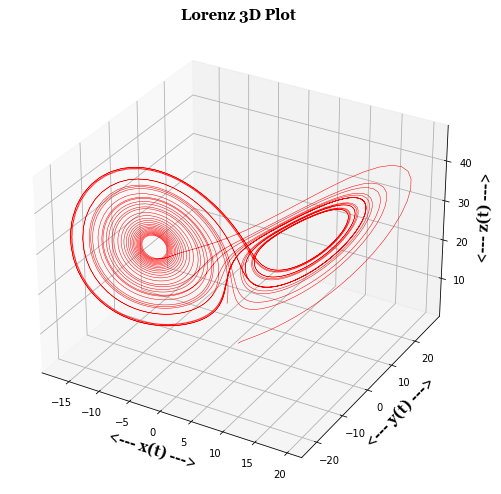

In [8]:
fig = plt.figure (figsize = (8.5, 8.5))
axis = fig.gca (projection = '3d')
axis.plot (γodeint[:, 0], γodeint[:, 1], γodeint[:, 2], linewidth = 0.5, color = 'red')
axis.set_xlabel('<--- x(t) --->', **font)
axis.set_ylabel('<--- y(t) --->', **font)
axis.set_zlabel('<--- z(t) --->', **font)
axis.set_title('Lorenz 3D Plot', **font)

### Solution using scipy.integrate.solve_ivp:

In [9]:
obj = integrate.solve_ivp(f, tif, γ0, method = 'RK45', t_eval = todeint)
tsolve_ivp = obj.t
γsolve_ivp = obj.y

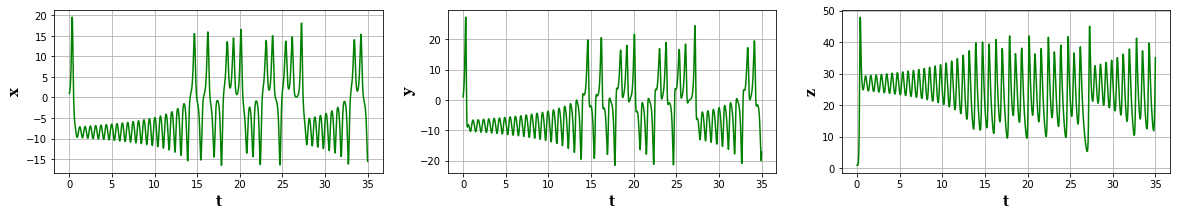

In [10]:
fig, axis = plt.subplots(ncols = 3, sharex = False, sharey = False, figsize = (20,3))

axis[0].plot(tsolve_ivp, γsolve_ivp[ 0 , :], '-g')
axis[0].set_xlabel('t', **font)
axis[0].set_ylabel('x', **font)
axis[0].grid()

axis[1].plot(tsolve_ivp, γsolve_ivp[ 1 , :], '-g')
axis[1].set_xlabel('t', **font)
axis[1].set_ylabel('y', **font)
axis[1].grid()

axis[2].plot(tsolve_ivp, γsolve_ivp[ 2 , :], '-g')
axis[2].set_xlabel('t', **font)
axis[2].set_ylabel('z', **font)
axis[2].grid()

Text(0.5, 0.92, 'Lorenz 3D Plot')

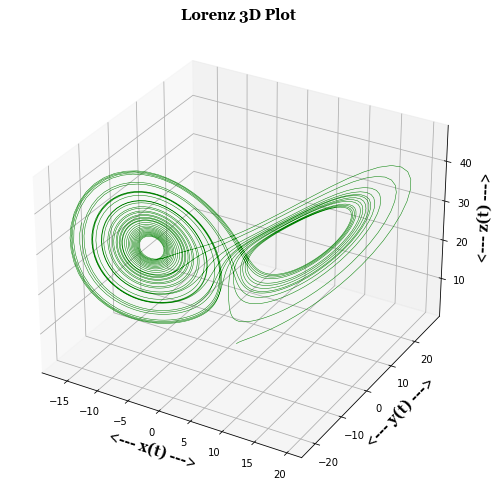

In [11]:
fig = plt.figure (figsize = (8.5, 8.5))
axis = fig.gca (projection = '3d')
axis.plot (γsolve_ivp[0, :], γsolve_ivp[1, :], γsolve_ivp[2, :], linewidth = 0.5, color = 'green')
axis.set_xlabel('<--- x(t) --->', **font)
axis.set_ylabel('<--- y(t) --->', **font)
axis.set_zlabel('<--- z(t) --->', **font)
axis.set_title('Lorenz 3D Plot', **font)

### Comparing results:

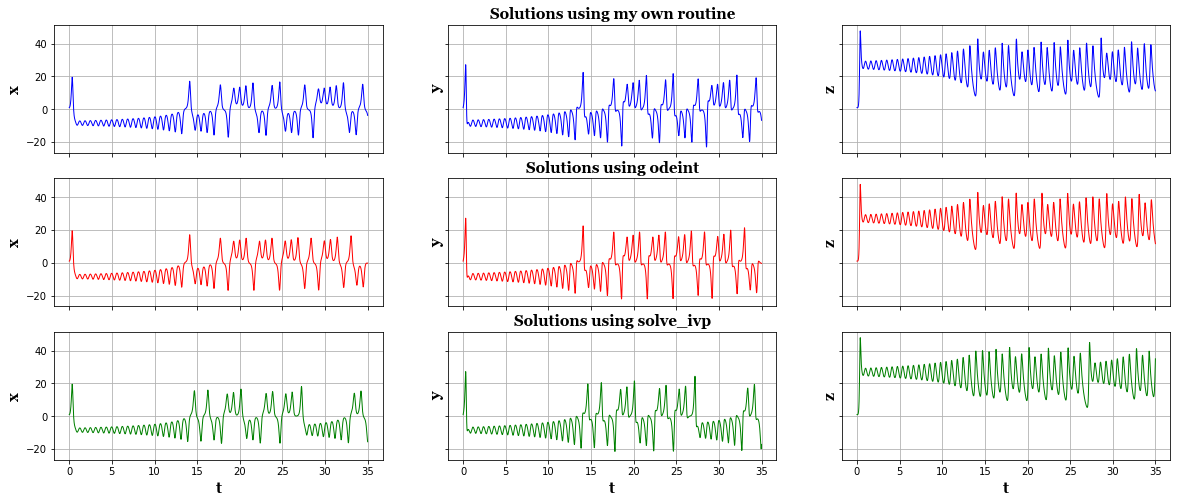

In [12]:
fig, axis = plt.subplots(nrows = 3, ncols = 3, sharex = True, sharey = True, figsize = (20, 8))

Axis = ['x', 'y', 'z']
Sol = [[t, γ, '-b', 'my own routine'], [todeint, γodeint, '-r', 'odeint'], [tsolve_ivp, np.transpose(γsolve_ivp), '-g', 'solve_ivp']]

row = 0
col = 0

for i in Axis:
    for j in Sol:
        
        axis[row, col].plot(j[0], j[1][:, col], j[2], linewidth = 1)
        axis[row, col].set_ylabel(i, **font)
        axis[row, col].grid()
        
        if j[3] == 'solve_ivp':
            axis[row, col].set_xlabel('t', **font)

        
        if i == 'y':
            
            axis[row, col].set_title('Solutions using ' + j[3], **font)
        
        row += 1
    
    col += 1
    row = 0

Curves in the same graph:

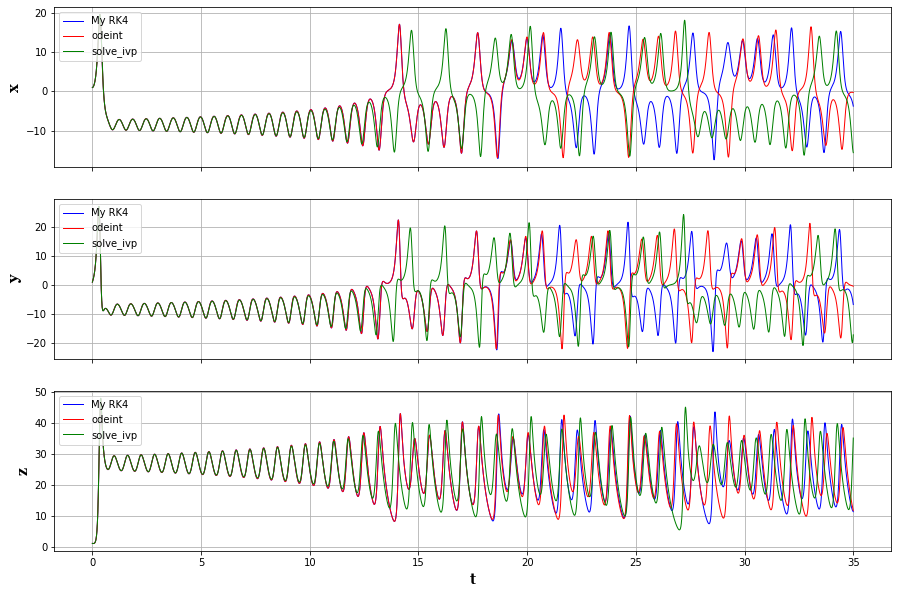

In [13]:
fig, axis = plt.subplots(nrows = 3, ncols = 1, sharex = True, sharey = False, figsize = (15,10))

cont = 0

for i in Axis:
    
    axis[cont].plot(Sol[0][0], Sol[0][1][:, cont], Sol[0][2], linewidth = 1, label = 'My RK4')
    axis[cont].plot(Sol[1][0], Sol[1][1][:, cont], Sol[1][2], linewidth = 1, label = 'odeint')
    axis[cont].plot(Sol[2][0], Sol[2][1][:, cont], Sol[2][2], linewidth = 1, label = 'solve_ivp')
    axis[cont].set_ylabel(i, **font)
    
    if i == 'z':
        
        axis[cont].set_xlabel('t', **font)
    
    axis[cont].legend()    
    axis[cont].grid()
    cont += 1   

For $x$, $y$ and $z$ the three solutions are similar up to a value of t between 10 and 15, then solve_ivp becomes different. My RK4 and odeint are similar up to a value of t between 20 and 25, then both solutions become different.

The divergence between the three solutions may be due to the fact that this system is extremely sensitive.